In [1]:
import datetime
import numpy as np
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()


/Applications/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
train = pd.read_csv('./data/file1.csv')
test = pd.read_csv('./data/file2.csv')


# 1 特征工程

In [3]:

column_tra = ["carid", "tradeTime", "brand", "serial", "model", "mileage", "color", "cityId", "carCode", "transferCount", "seatings", "registerDate",
              "licenseDate", "country", "maketype", "modelyear", "displacement", "gearbox", "oiltype", "newprice", "anonymousFeature1", "anonymousFeature2",
              "anonymousFeature3", "anonymousFeature5", "anonymousFeature6", "anonymousFeature11", "anonymousFeature12", "anonymousFeature14", "price"]
column_te = ["carid", "tradeTime", "brand", "serial", "model", "mileage", "color", "cityId", "carCode", "transferCount", "seatings", "registerDate",
             "licenseDate", "country", "maketype", "modelyear", "displacement", "gearbox", "oiltype", "newprice", "anonymousFeature1", "anonymousFeature2",
             "anonymousFeature3", "anonymousFeature5", "anonymousFeature6", "anonymousFeature11", "anonymousFeature12", "anonymousFeature14"]
train = train[column_tra]
test = test[column_te]


## 1.1 缺失值处理

In [4]:
# 以下分类特征全部填充众数
train['carCode'] = train['carCode'].fillna(1)
train['modelyear'] = train['modelyear'].fillna(2017)
train['country'] = train['country'].fillna(779412)
train['maketype'] = train['maketype'].fillna(2)
train['gearbox'] = train['gearbox'].fillna(3)
train['anonymousFeature5'] = train['anonymousFeature5'].fillna(8)

test['carCode'] = test['carCode'].fillna(1)
test['modelyear'] = test['modelyear'].fillna(2017)
test['country'] = test['country'].fillna(779412)
test['maketype'] = test['maketype'].fillna(2)
test['gearbox'] = test['gearbox'].fillna(3)
test['anonymousFeature5'] = test['anonymousFeature5'].fillna(8)

train['anonymousFeature1'] = train['anonymousFeature1'].fillna(1)
train['anonymousFeature11'] = train['anonymousFeature11'].fillna('1+2')

test['anonymousFeature1'] = test['anonymousFeature1'].fillna(1)
test['anonymousFeature11'] = test['anonymousFeature11'].fillna('1+2')


## 1.2 提取时间特征

In [5]:
# # 时间处理(提取年月日)
train['tradeTime'] = pd.to_datetime(train['tradeTime'])
train['registerDate'] = pd.to_datetime(train['registerDate'])
train['licenseDate'] = pd.to_datetime(train['licenseDate'])
test['tradeTime'] = pd.to_datetime(test['tradeTime'])
test['registerDate'] = pd.to_datetime(test['registerDate'])
test['licenseDate'] = pd.to_datetime(test['licenseDate'])


train['tradeTime_year'] = train['tradeTime'].dt.year
train['tradeTime_month'] = train['tradeTime'].dt.month
train['tradeTime_day'] = train['tradeTime'].dt.day

train['registerDate_year'] = train['registerDate'].dt.year
train['registerDate_month'] = train['registerDate'].dt.month
train['registerDate_day'] = train['registerDate'].dt.day


test['tradeTime_year'] = test['tradeTime'].dt.year
test['tradeTime_month'] = test['tradeTime'].dt.month
test['tradeTime_day'] = test['tradeTime'].dt.day

test['registerDate_year'] = test['registerDate'].dt.year
test['registerDate_month'] = test['registerDate'].dt.month
test['registerDate_day'] = test['registerDate'].dt.day

train['licenseDate_year'] = train['licenseDate'].dt.year
train['licenseDate_month'] = train['licenseDate'].dt.month
train['licenseDate_day'] = train['licenseDate'].dt.day

test['licenseDate_year'] = test['licenseDate'].dt.year
test['licenseDate_month'] = test['licenseDate'].dt.month
test['licenseDate_day'] = test['licenseDate'].dt.day

del train['tradeTime']
del test['tradeTime']
del train['registerDate']
del test['registerDate']
del train['licenseDate']
del test['licenseDate']


## 1.3 匿名特征12的处理

In [6]:
series1 = train['anonymousFeature12'].str.split('*', expand=True)
train['length'] = series1[0]
train['width'] = series1[1]
train['high'] = series1[2]
series2 = test['anonymousFeature12'].str.split('*', expand=True)
test['length'] = series2[0]
test['width'] = series2[1]
test['high'] = series2[2]


train['length'] = train['length'].astype(float)
train['width'] = train['width'].astype(float)
train['high'] = train['high'].astype(float)

train['volume'] = train['length']*train['width']*train['high']

test['length'] = test['length'].astype(float)
test['width'] = test['width'].astype(float)
test['high'] = test['high'].astype(float)
test['volume'] = test['length']*test['width']*test['high']

del train['anonymousFeature12']
del test['anonymousFeature12']


In [7]:
test.isnull().any()


carid                 False
brand                 False
serial                False
model                 False
mileage               False
color                 False
cityId                False
carCode               False
transferCount         False
seatings              False
country               False
maketype              False
modelyear             False
displacement          False
gearbox               False
oiltype               False
newprice              False
anonymousFeature1     False
anonymousFeature2     False
anonymousFeature3     False
anonymousFeature5     False
anonymousFeature6     False
anonymousFeature11    False
anonymousFeature14    False
tradeTime_year        False
tradeTime_month       False
tradeTime_day         False
registerDate_year     False
registerDate_month    False
registerDate_day      False
licenseDate_year      False
licenseDate_month     False
licenseDate_day       False
length                 True
width                  True
high                

## 1.4 填充测试集中的缺失值

In [8]:
# tt = test.isnull().any()  # 用来判断某列是否有缺失值
# test中匿名特征12有一个缺失值
tt2 = test.isna().sum()
tt2[tt2 > 0]
test['length'] = test['length'].fillna(4630)
test['width'] = test['width'].fillna(1392)
test['high'] = test['high'].fillna(1470)
test['volume'] = test['volume'].fillna(4630*1392*1470)


## 1.5 匿名特征11的处理

In [9]:
dict = {'1': 1,
        '1+2': 2,
        '3+2': 3,
        '1+2,4+2': 4,
        '1,3+2': 5,
        '5': 6}

train['anonymousFeature11'] = train['anonymousFeature11'].map(dict)
test['anonymousFeature11'] = test['anonymousFeature11'].map(dict)
del train['anonymousFeature11']
del test['anonymousFeature11']


/Applications/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


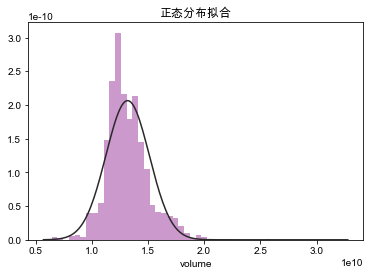

In [10]:
import scipy.stats as st
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
y = train['volume']
plt.title('正态分布拟合')
fig = sns.distplot(y, kde=False, fit=st.norm,color='purple')
scatter_fig = fig.get_figure()
#近似正态分布，不需要转换

## 1.6 异常值处理

In [11]:
train = train[train['price']<700]
train.shape

(29999, 37)

## 1.7 数据分布转换

In [12]:
# 删除训练集中异常值
# df_train = train.drop(train[abs(train['newprice']-train['price']) > 100].index)
df_train = train

train_y = np.log1p(df_train['price'])
df_train['newprice'] = np.log1p(df_train['newprice'])
df_train['mileage'] = np.log1p(df_train['mileage'])
test['mileage'] = np.log1p(test['mileage'])
test['newprice'] = np.log1p(test['newprice'])
df_train.shape


(29999, 37)

# 1.8 特征交叉

In [13]:
## 数据分布转换
data = pd.concat([df_train[test.columns.tolist()], test],
                 ignore_index=True, sort=False)
data.shape


(34999, 36)

In [14]:
#定义交叉特征统计
def cross_cat_num(df, num_col, cat_col):
    for f1 in tqdm(cat_col):
        g = df.groupby(f1, as_index=False)
        for f2 in tqdm(num_col):
            feat = g[f2].agg({
                '{}_{}_max'.format(f1, f2): 'max', '{}_{}_min'.format(f1, f2): 'min',
                '{}_{}_median'.format(f1, f2): 'median',
                '{}_{}_sum'.format(f1, f2): 'sum',
                '{}_{}_mad'.format(f1, f2): 'mad',
            })
            df = df.merge(feat, on=f1, how='left')
    return(df)

### 用数值特征对类别特征做统计刻画，随便挑了几个跟price相关性最高的匿名特征
cross_cat = ['width','length','anonymousFeature2','modelyear','maketype','registerDate_year','country','carCode','anonymousFeature5','gearbox',
            'cityId','anonymousFeature6','brand']

cross_num = ['newprice', 'mileage', 'displacement']
data2 = cross_cat_num(data, cross_num, cross_cat)  # 一阶交叉
data2.shape


100%|██████████| 13/13 [00:05<00:00,  2.59it/s]


(34999, 231)

# ## 1.9 特征降维

步骤一：根据与price的相关性，筛选性相关性高的特征

In [15]:
# 筛选与price相关系数大于0.1的特征

tmp_train = data2[:-5000].copy()
tmp_train['price'] = train_y
col_list = tmp_train.columns.tolist()
mcorr = tmp_train[col_list].corr(method='spearman').abs()

tt = mcorr['price'] > 0.1
new_col = list(tt[tt == True].index)
new_col.remove('price')

train_df = data2[new_col][:-5000].copy()
train_df['price'] = list(train_y)
test_df = data2[new_col][-5000:].copy()
len(new_col)

步骤二：PCA特征降维（舍弃）

In [13]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=100)
# all_pca = pca.fit_transform(data2[new_col])

# all_pca_df = pd.DataFrame(all_pca)
# train_df = all_pca_df[:-5000].copy()
# train_df['price'] = list(train_y)
# test_df = all_pca_df[-5000:].copy()

# all_pca.shape

(35000, 100)

## 1.10 存储清洗数据

In [17]:
train_df.to_csv('./data/clear_train.csv',index=0)
test_df.to_csv('./data/clear_test.csv', index=0)


# 2 训练模型

In [1]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
from sklearn.model_selection import KFold
import xgboost as xgb
from catboost import CatBoostRegressor
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
train = pd.read_csv('./data/clear_train.csv')
test = pd.read_csv('./data/clear_test.csv')


In [3]:

train_y = train['price']
del train['price']
scaler = StandardScaler()
train_x = scaler.fit_transform(train)
test_x = scaler.fit_transform(test)

In [4]:
from sklearn import metrics

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression_l1',
    'metric': 'mae',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
}

def MAPE_metric(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def MAE_metric(y_true, y_pred):
    return metrics.mean_absolute_error(y_true, y_pred)
def Accuracy_metric(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n
    alpha = pd.DataFrame(abs(y_true - y_pred)/y_true)
    Accuracy = (alpha[alpha <= 0.05].count() /alpha.count())*0.8+0.2*(1-mape)
    return np.float(Accuracy)

In [5]:
import os
# 存储训练结果的字典
import pickle


def save_dict(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_dict(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)


if os.path.exists('./data/dict_acc.pkl_{}'.format(features)):
    # 读取字典
    dict_acc = load_dict("./data/dict_acc_{}".format(features))
    dict_mae = load_dict("./data/dict_mae_{}".format(features))
    dict_mape = load_dict("./data/dict_mape_{}".format(features))
else:
    dict_acc = {}
    dict_mape = {}
    dict_mae = {}
    preds_lgb = np.zeros(len(test_x))
    preds_xgb = np.zeros(len(test_x))
    preds_cat = np.zeros(len(test_x))
    folds = 5
    kfold = KFold(n_splits=folds, shuffle=True, random_state=5421)
    for fold, (trn_idx, val_idx) in enumerate(kfold.split(train_x, train_y)):
        import lightgbm as lgb
        print('-------fold {}-------'.format(fold))
        x_tra, y_trn, x_val, y_val = train_x[trn_idx], train_y.iloc[trn_idx], train_x[val_idx], train_y.iloc[val_idx]

        train_set = lgb.Dataset(x_tra, y_trn)
        val_set = lgb.Dataset(x_val, y_val)
        # lgb
        print('---正在训练lgb---')
        lgbmodel = lgb.train(params, train_set, num_boost_round=3000,
                             valid_sets=(train_set, val_set),
                             #   feval=Accuracy_metric,
                             early_stopping_rounds=500,
                             verbose_eval=False)
        val_pred_xgb = lgbmodel.predict(
            x_val, predict_disable_shape_check=True)
        preds_lgb += lgbmodel.predict(test_x,
                                      predict_disable_shape_check=True) / folds
        val_acc = Accuracy_metric(y_val, val_pred_xgb)
        val_mae = MAE_metric(y_val, val_pred_xgb)
        val_mape = MAPE_metric(y_val, val_pred_xgb)
        dict_acc['lgb_acc_{}'.format(fold+1)] = val_acc
        dict_mae['lgb_mae_{}'.format(fold+1)] = val_mae
        dict_mape['lgb_mape_{}'.format(fold+1)] = val_mape
        print('lgb val_acc {}'.format(val_acc))
        # xgb
        print('---正在训练XGBRegressor---')
        xgbmodel = xgb.XGBRegressor(
            objective='reg:squarederror',
            n_jobs=-1,
            n_estimators=1000,
            max_depth=7,
            subsample=0.8,
            learning_rate=0.05,
            gamma=0,
            colsample_bytree=0.9,
            random_state=2021, max_features=None, alpha=0.3)
        xgbmodel2 = xgbmodel.fit(x_tra, y_trn, verbose=False)
        val_pred_xgb = xgbmodel2.predict(x_val)
        preds_xgb += xgbmodel2.predict(test_x,) / folds
        val_acc = Accuracy_metric(y_val, val_pred_xgb)
        val_mae = MAE_metric(y_val, val_pred_xgb)
        val_mape = MAPE_metric(y_val, val_pred_xgb)
        dict_acc['xgb_acc_{}'.format(fold+1)] = val_acc
        dict_mae['xgb_mae_{}'.format(fold+1)] = val_mae
        dict_mape['xgb_mape_{}'.format(fold+1)] = val_mape
        print('xgb val_acc {}'.format(val_acc))

        # cat
        print('---正在训练CatBoostRegressor---')
        catmodel = CatBoostRegressor(
            iterations=3000, learning_rate=0.03,
            depth=7,
            l2_leaf_reg=4,
            loss_function='MAE',
            eval_metric='MAE',
            random_seed=2021)
        catmodel2 = catmodel.fit(x_tra, y_trn, verbose=False)
        val_pred_cat = catmodel2.predict(x_val)
        preds_cat += catmodel2.predict(test_x,) / folds
        val_acc = Accuracy_metric(y_val, val_pred_cat)
        val_mae = MAE_metric(y_val, val_pred_cat)
        val_mape = MAPE_metric(y_val, val_pred_cat)
        dict_acc['cat_acc_{}'.format(fold+1)] = val_acc
        dict_mae['cat_mae_{}'.format(fold+1)] = val_mae
        dict_mape['cat_mape_{}'.format(fold+1)] = val_mape
        print('cat val_acc {}'.format(val_acc))

        # lr
        print('---正在训练LinearRegression---')
        lrmodel = LinearRegression().fit(x_tra, y_trn)
        val_pred_lr = lrmodel.predict(x_val)
        val_acc = Accuracy_metric(y_val, val_pred_lr)
        val_mae = MAE_metric(y_val, val_pred_lr)
        val_mape = MAPE_metric(y_val, val_pred_lr)
        dict_acc['lr_acc_{}'.format(fold+1)] = val_acc
        dict_mae['lr_mae_{}'.format(fold+1)] = val_mae
        dict_mape['lr_mape_{}'.format(fold+1)] = val_mape
        print('lr val_acc {}'.format(val_acc))

        # knn
        print('---正在训练KNeighborsRegressor---')
        knnmodel = KNeighborsRegressor(n_neighbors=8).fit(x_tra, y_trn)
        val_pred_knn = knnmodel.predict(x_val)
        val_acc = Accuracy_metric(y_val, val_pred_knn)
        val_mae = MAE_metric(y_val, val_pred_knn)
        val_mape = MAPE_metric(y_val, val_pred_knn)
        dict_acc['knn_acc_{}'.format(fold+1)] = val_acc
        dict_mae['knn_mae_{}'.format(fold+1)] = val_mae
        dict_mape['knn_mape_{}'.format(fold+1)] = val_mape
        print('knn val_acc {}'.format(val_acc))

        # rf
        print('---正在训练RandomForestRegressor---')
        rfmodel = RandomForestRegressor(n_estimators=200).fit(x_tra, y_trn)
        val_pred_rf = rfmodel.predict(x_val)
        val_acc = Accuracy_metric(y_val, val_pred_rf)
        val_mae = MAE_metric(y_val, val_pred_rf)
        val_mape = MAPE_metric(y_val, val_pred_rf)
        dict_acc['rf_acc_{}'.format(fold+1)] = val_acc
        dict_mae['rf_mae_{}'.format(fold+1)] = val_mae
        dict_mape['rf_mape_{}'.format(fold+1)] = val_mape
        print('rf val_acc {}'.format(val_acc))
        print('-'*20)

    # dict_acc['lr_5'] = 0.7032255321076033
    # 存储字典
    save_dict(dict_acc, "./data/dict_acc_{}".format(features))
    save_dict(dict_mae, "./data/dict_mae_{}".format(features))
    save_dict(dict_mape, "./data/dict_mape_{}".format(features))


1/5 fold val_acc:0.8557330586228407 val_mae:0.06661852673799193 val_mape:3.3334706885797045
2/5 fold val_acc:0.8485010443957735 val_mae:0.06621966804184289 val_mape:4.34947780211332
3/5 fold val_acc:0.8479791536199219 val_mae:0.06722000490403508 val_mape:3.4104231900390762
4/5 fold val_acc:0.8456434744844146 val_mae:0.06867155640048217 val_mape:3.4449294244594406
5/5 fold val_acc:0.8548039181944481 val_mae:0.06623221320010401 val_mape:3.33137423610926


In [ ]:
dict_acc = {}
dict_mape = {}
dict_mae = {}
preds_lgb = np.zeros(len(test_x))
preds_xgb = np.zeros(len(test_x))
preds_cat = np.zeros(len(test_x))
folds = 5
kfold = KFold(n_splits=folds, shuffle=True, random_state=5421)
for fold, (trn_idx, val_idx) in enumerate(kfold.split(train_x, train_y)):
    import lightgbm as lgb
    print('-------fold {}-------'.format(fold))
    x_tra, y_trn, x_val, y_val = train_x[trn_idx], train_y.iloc[trn_idx], train_x[val_idx], train_y.iloc[val_idx]

    train_set = lgb.Dataset(x_tra, y_trn)
    val_set = lgb.Dataset(x_val, y_val)
    # lgb
    print('---正在训练lgb---')
    lgbmodel = lgb.train(params, train_set, num_boost_round=3000,
                            valid_sets=(train_set, val_set),
                            #   feval=Accuracy_metric,
                            early_stopping_rounds=500,
                            verbose_eval=False)
    val_pred_xgb = lgbmodel.predict(
        x_val, predict_disable_shape_check=True)
    preds_lgb += lgbmodel.predict(test_x,
                                    predict_disable_shape_check=True) / folds
    val_acc = Accuracy_metric(y_val, val_pred_xgb)
    val_mae = MAE_metric(y_val, val_pred_xgb)
    val_mape = MAPE_metric(y_val, val_pred_xgb)
    dict_acc['lgb_acc_{}'.format(fold+1)] = val_acc
    dict_mae['lgb_mae_{}'.format(fold+1)] = val_mae
    dict_mape['lgb_mape_{}'.format(fold+1)] = val_mape
    print('lgb val_acc {}'.format(val_acc))
    # xgb
    print('---正在训练XGBRegressor---')
    xgbmodel = xgb.XGBRegressor(
        objective='reg:squarederror',
        n_jobs=-1,
        n_estimators=1000,
        max_depth=7,
        subsample=0.8,
        learning_rate=0.05,
        gamma=0,
        colsample_bytree=0.9,
        random_state=2021, max_features=None, alpha=0.3)
    xgbmodel2 = xgbmodel.fit(x_tra, y_trn, verbose=False)
    val_pred_xgb = xgbmodel2.predict(x_val)
    preds_xgb += xgbmodel2.predict(test_x,) / folds
    val_acc = Accuracy_metric(y_val, val_pred_xgb)
    val_mae = MAE_metric(y_val, val_pred_xgb)
    val_mape = MAPE_metric(y_val, val_pred_xgb)
    dict_acc['xgb_acc_{}'.format(fold+1)] = val_acc
    dict_mae['xgb_mae_{}'.format(fold+1)] = val_mae
    dict_mape['xgb_mape_{}'.format(fold+1)] = val_mape
    print('xgb val_acc {}'.format(val_acc))

    # cat
    print('---正在训练CatBoostRegressor---')
    catmodel = CatBoostRegressor(
        iterations=3000, learning_rate=0.03,
        depth=7,
        l2_leaf_reg=4,
        loss_function='MAE',
        eval_metric='MAE',
        random_seed=2021)
    catmodel2 = catmodel.fit(x_tra, y_trn, verbose=False)
    val_pred_cat = catmodel2.predict(x_val)
    preds_cat += catmodel2.predict(test_x,) / folds
    val_acc = Accuracy_metric(y_val, val_pred_cat)
    val_mae = MAE_metric(y_val, val_pred_cat)
    val_mape = MAPE_metric(y_val, val_pred_cat)
    dict_acc['cat_acc_{}'.format(fold+1)] = val_acc
    dict_mae['cat_mae_{}'.format(fold+1)] = val_mae
    dict_mape['cat_mape_{}'.format(fold+1)] = val_mape
    print('cat val_acc {}'.format(val_acc))

    # lr
    print('---正在训练LinearRegression---')
    lrmodel = LinearRegression().fit(x_tra, y_trn)
    val_pred_lr = lrmodel.predict(x_val)
    val_acc = Accuracy_metric(y_val, val_pred_lr)
    val_mae = MAE_metric(y_val, val_pred_lr)
    val_mape = MAPE_metric(y_val, val_pred_lr)
    dict_acc['lr_acc_{}'.format(fold+1)] = val_acc
    dict_mae['lr_mae_{}'.format(fold+1)] = val_mae
    dict_mape['lr_mape_{}'.format(fold+1)] = val_mape
    print('lr val_acc {}'.format(val_acc))

    # knn
    print('---正在训练KNeighborsRegressor---')
    knnmodel = KNeighborsRegressor(n_neighbors=8).fit(x_tra, y_trn)
    val_pred_knn = knnmodel.predict(x_val)
    val_acc = Accuracy_metric(y_val, val_pred_knn)
    val_mae = MAE_metric(y_val, val_pred_knn)
    val_mape = MAPE_metric(y_val, val_pred_knn)
    dict_acc['knn_acc_{}'.format(fold+1)] = val_acc
    dict_mae['knn_mae_{}'.format(fold+1)] = val_mae
    dict_mape['knn_mape_{}'.format(fold+1)] = val_mape
    print('knn val_acc {}'.format(val_acc))

    # rf
    print('---正在训练RandomForestRegressor---')
    rfmodel = RandomForestRegressor(n_estimators=200).fit(x_tra, y_trn)
    val_pred_rf = rfmodel.predict(x_val)
    val_acc = Accuracy_metric(y_val, val_pred_rf)
    val_mae = MAE_metric(y_val, val_pred_rf)
    val_mape = MAPE_metric(y_val, val_pred_rf)
    dict_acc['rf_acc_{}'.format(fold+1)] = val_acc
    dict_mae['rf_mae_{}'.format(fold+1)] = val_mae
    dict_mape['rf_mape_{}'.format(fold+1)] = val_mape
    print('rf val_acc {}'.format(val_acc))
    print('-'*20)

## 2.2 多模型结果对比可视化

In [3]:
import os
# 存储训练结果的字典
import pickle

def save_dict(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
def load_dict(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)
features = 161
dict_acc = load_dict("./data/dict_acc_{}".format(features))
dict_mae = load_dict("./data/dict_mae_{}".format(features))
dict_mape = load_dict("./data/dict_mape_{}".format(features))
dict_mae['lr_mae_5'] = 0.12960395775790178
dict_acc['lr_acc_5'] = 0.6967119924001642
dict_mape['lr_mape_5'] = 5.254548311158716


In [4]:

val_acc_lr = []
val_acc_knn = []
val_acc_cat =[]
val_acc_lgb = []
val_acc_xgb = []

val_mae_lr = []
val_mae_knn = []
val_mae_cat = []
val_mae_lgb = []
val_mae_xgb = []

val_mape_lr = []
val_mape_knn = []
val_mape_cat = []
val_mape_lgb = []
val_mape_xgb = []
for i in range(5):
    val_acc_lr.append(dict_acc['lr_acc_{}'.format(i+1)])
    val_acc_knn.append(dict_acc['knn_acc_{}'.format(i+1)])
    val_acc_cat.append(dict_acc['cat_acc_{}'.format(i+1)])
    val_acc_lgb.append(dict_acc['lgb_acc_{}'.format(i+1)])
    val_acc_xgb.append(dict_acc['xgb_acc_{}'.format(i+1)])

    val_mae_lr.append(dict_mae['lr_mae_{}'.format(i+1)])
    val_mae_knn.append(dict_mae['knn_mae_{}'.format(i+1)])
    val_mae_cat.append(dict_mae['cat_mae_{}'.format(i+1)])
    val_mae_lgb.append(dict_mae['lgb_mae_{}'.format(i+1)])
    val_mae_xgb.append(dict_mae['xgb_mae{}'.format(i+1)])

    val_mape_lr.append(dict_mape['lr_mape_{}'.format(i+1)])
    val_mape_knn.append(dict_mape['knn_mape_{}'.format(i+1)])
    val_mape_cat.append(dict_mape['cat_mape_{}'.format(i+1)])
    val_mape_lgb.append(dict_mape['lgb_mape_{}'.format(i+1)])
    val_mape_xgb.append(dict_mape['xgb_mape_{}'.format(i+1)])

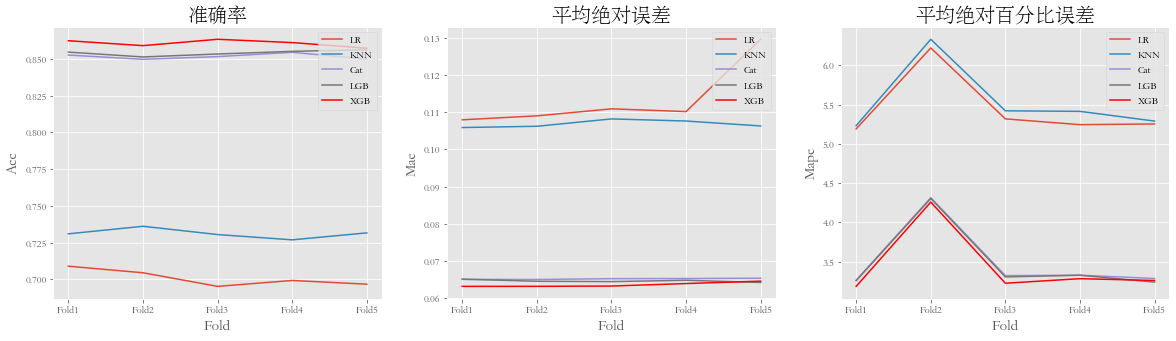

In [6]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(20, 5))
plt.subplot(131)

x = ['Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']
plt.plot(x, val_acc_lr)
plt.plot(x, val_acc_knn)
plt.plot(x, val_acc_cat)
plt.plot(x, val_acc_lgb)
plt.plot(x, val_acc_xgb, "#FF0000")
plt.xlabel("Fold", fontsize=15)
plt.ylabel("Acc", fontsize=15)
plt.legend(['LR', 'KNN', 'Cat', 'LGB', 'XGB'], loc="upper right")
plt.title("准确率", fontsize=20)


plt.subplot(132)
plt.plot(x, val_mae_lr)
plt.plot(x, val_mae_knn)
plt.plot(x, val_mae_cat)
plt.plot(x, val_mae_lgb)
plt.plot(x, val_mae_xgb, "#FF0000")
plt.xlabel("Fold", fontsize=15)
plt.ylabel("Mae", fontsize=15)
plt.legend(['LR', 'KNN', 'Cat', 'LGB', 'XGB'], loc="upper right")
plt.title("平均绝对误差", fontsize=20)


plt.subplot(133)
plt.plot(x, val_mape_lr)
plt.plot(x, val_mape_knn)
plt.plot(x, val_mape_cat)
plt.plot(x, val_mape_lgb)
plt.plot(x, val_mape_xgb, "#FF0000")
plt.xlabel("Fold", fontsize=15)
plt.ylabel("Mape", fontsize=15)
plt.legend(['LR', 'KNN', 'Cat', 'LGB', 'XGB'], loc="upper right")
plt.title("平均绝对百分比误差", fontsize=20)
plt.savefig('img/Q1-img/多模型对比.png', dpi=300)


In [22]:
val_mape_xgb
# val_acc_knn.append(dict_acc['knn_acc_{}'.format(i+1)])
# val_acc_cat.append(dict_acc['cat_acc_{}'.format(i+1)])
# val_acc_lgb.append(dict_acc['lgb_acc_{}'.format(i+1)])
# val_acc_xgb.append(dict_acc['xgb_acc_{}'.format(i+1)])

# val_mae_lr.append(dict_mae['lr_mae_{}'.format(i+1)])
# val_mae_knn.append(dict_mae['knn_mae_{}'.format(i+1)])
# val_mae_cat.append(dict_mae['cat_mae_{}'.format(i+1)])
# val_mae_lgb.append(dict_mae['lgb_mae_{}'.format(i+1)])
# val_mae_xgb.append(dict_mae['xgb_mae{}'.format(i+1)])

# val_mape_lr.append(dict_mape['lr_mape_{}'.format(i+1)])
# val_mape_knn.append(dict_mape['knn_mape_{}'.format(i+1)])
# val_mape_cat.append(dict_mape['cat_mape_{}'.format(i+1)])
# val_mape_lgb.append(dict_mape['lgb_mape_{}'.format(i+1)])
# val_mape_xgb.append(dict_mape['xgb_mape_{}'.format(i+1)])

[3.186677605862028,
 4.259766216518742,
 3.226554717502992,
 3.2845624127292505,
 3.2613602766123186]

# 3 模型平均融合

In [ ]:
submit_df = pd.DataFrame(columns=['price'])
submit_df['price'] = (preds_xgb+preds_lgb+preds_cat)/3
submit_df = submit_df.price.apply(np.expm1)  # np.log1p与np.expm1互为逆运算
submit_df.to_csv('./data/估价模型结果.csv', header=0)

# 4 多模型对比可视化

In [1]:
import os
# 存储训练结果的字典
import pickle


def save_dict(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)


def load_dict(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

# 读取字典
dict_acc = load_dict("./data/dict_acc")
dict_mae = load_dict("./data/dict_mae")
dict_mape = load_dict("./data/dict_mape")

val_acc_lr = []
val_acc_knn = []
val_acc_cat = []
val_acc_lgb = []
val_acc_xgb = []

val_mae_lr = []
val_mae_knn = []
val_mae_cat = []
val_mae_lgb = []
val_mae_xgb = []

val_mape_lr = []
val_mape_knn = []
val_mape_cat = []
val_mape_lgb = []
val_mape_xgb = []
for i in range(5):
    val_acc_lr.append(dict_acc['lr_{}'.format(i+1)])
    val_acc_knn.append(dict_acc['knn_{}'.format(i+1)])
    val_acc_cat.append(dict_acc['cat_{}'.format(i+1)])
    val_acc_lgb.append(dict_acc['lgb_{}'.format(i+1)])
    val_acc_xgb.append(dict_acc['xgb_{}'.format(i+1)])

    val_mae_lr.append(dict_acc['lr_{}'.format(i+1)])
    val_mae_knn.append(dict_acc['knn_{}'.format(i+1)])
    val_mae_cat.append(dict_acc['cat_{}'.format(i+1)])
    val_mae_lgb.append(dict_acc['lgb_{}'.format(i+1)])
    val_mae_xgb.append(dict_acc['xgb_{}'.format(i+1)])

    val_mape_lr.append(dict_acc['lr_{}'.format(i+1)])
    val_mape_knn.append(dict_acc['knn_{}'.format(i+1)])
    val_mape_cat.append(dict_acc['cat_{}'.format(i+1)])
    val_mape_lgb.append(dict_acc['lgb_{}'.format(i+1)])
    val_mape_xgb.append(dict_acc['xgb_{}'.format(i+1)])

In [10]:
dict_acc

{'lgb_1': 0.8538503727459749,
 'xgb_1': 0.8604951880352927,
 'cat_1': 0.8535605697732419,
 'lr_1': 0.7115465538381492,
 'knn_1': 0.7279798926863539,
 'rf_1': 0.8404296569604343,
 'lgb_2': 0.8551878559391477,
 'xgb_2': 0.8582605022924821,
 'cat_2': 0.8508957358447833,
 'lr_2': 0.7046879372824132,
 'knn_2': 0.740957071340712,
 'rf_2': 0.8332709629993695,
 'lgb_3': 0.8526025527352463,
 'xgb_3': 0.8549700348696154,
 'cat_3': 0.8513295051295579,
 'lr_3': 0.6967264209318988,
 'knn_3': 0.7341562096570302,
 'rf_3': 0.8342809474629476,
 'lgb_4': 0.8530471003717748,
 'xgb_4': 0.8611782258510648,
 'cat_4': 0.8518527348221101,
 'lr_4': 0.7032255321076033,
 'knn_4': 0.7276375348963657,
 'rf_4': 0.8324681397750748,
 'lgb_5': 0.8566534475539025,
 'xgb_5': 0.8568145425302572,
 'cat_5': 0.8536539757591236,
 'lr_5': 0.7032255321076033,
 'knn_5': 0.7341050802417305,
 'rf_5': 0.8378321611076207}

In [5]:
val_mape_xgb

[0.8604951880352927,
 0.8582605022924821,
 0.8549700348696154,
 0.8611782258510648,
 0.8568145425302572]

In [8]:
val_mae_xgb

[0.8604951880352927,
 0.8582605022924821,
 0.8549700348696154,
 0.8611782258510648,
 0.8568145425302572]

In [9]:
val_acc_xgb

[0.8604951880352927,
 0.8582605022924821,
 0.8549700348696154,
 0.8611782258510648,
 0.8568145425302572]

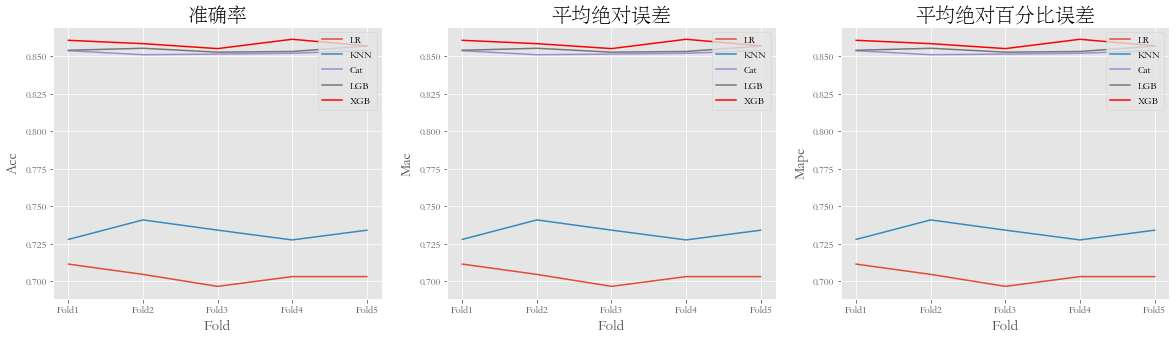

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
plt.figure(figsize=(20,5)) 
plt.subplot(131)

x=['Fold1','Fold2','Fold3','Fold4','Fold5']
plt.plot(x, val_acc_lr)
plt.plot(x, val_acc_knn)
plt.plot(x, val_acc_cat)
plt.plot(x, val_acc_lgb)
plt.plot(x, val_acc_xgb, "#FF0000")
plt.xlabel("Fold",fontsize=15) 
plt.ylabel("Acc",fontsize=15)
plt.legend(['LR','KNN','Cat','LGB','XGB'],loc="upper right")
plt.title("准确率",fontsize=20)



plt.subplot(132)
plt.plot(x, val_mae_lr)
plt.plot(x, val_mae_knn)
plt.plot(x, val_mae_cat)
plt.plot(x, val_mae_lgb)
plt.plot(x, val_mae_xgb, "#FF0000")
plt.xlabel("Fold",fontsize=15) 
plt.ylabel("Mae",fontsize=15)
plt.legend(['LR','KNN','Cat','LGB','XGB'],loc="upper right")
plt.title("平均绝对误差",fontsize=20)


plt.subplot(133)
plt.plot(x, val_mape_lr)
plt.plot(x, val_mape_knn)
plt.plot(x, val_mape_cat)
plt.plot(x, val_mape_lgb)
plt.plot(x, val_mape_xgb, "#FF0000")
plt.xlabel("Fold",fontsize=15) 
plt.ylabel("Mape",fontsize=15)
plt.legend(['LR','KNN','Cat','LGB','XGB'],loc="upper right")
plt.title("平均绝对百分比误差",fontsize=20)
plt.savefig('img/Q1-img/多模型对比.png',dpi=300)